In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow as keras
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.models import Sequential



2026-01-03 10:47:36.734778: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-03 10:47:55.562712: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-03 10:48:05.021424: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [3]:
data=pd.read_csv("../Dataset/fashion-mnist_train.csv")
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.shape

(60000, 785)

In [5]:
data.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [6]:
X=data.drop(columns='label').astype('float32')
y=data['label']

In [7]:
print(X.max())

pixel1       16.0
pixel2       36.0
pixel3      226.0
pixel4      164.0
pixel5      227.0
            ...  
pixel780    255.0
pixel781    255.0
pixel782    255.0
pixel783    255.0
pixel784    170.0
Length: 784, dtype: float32


In [8]:
#normalize
X=X/255.0

In [9]:
model=Sequential([
    Input(shape=(784,)),
    Dense(units=128,activation='relu'),
    Dense(units=64,activation='relu'),
    Dense(units=10,activation='softmax'),

])

2026-01-03 10:48:19.858306: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [10]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    # optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    # metrics=['accuracy']
)

In [11]:
model.fit(
    X,y,epochs=10,batch_size=32
)

Epoch 1/10


2026-01-03 10:48:20.980649: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 0.5068 - sparse_categorical_accuracy: 0.8175
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3819 - sparse_categorical_accuracy: 0.8617
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3524 - sparse_categorical_accuracy: 0.8730
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3396 - sparse_categorical_accuracy: 0.8793
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3308 - sparse_categorical_accuracy: 0.8825
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3238 - sparse_categorical_accuracy: 0.8855
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3176 - sparse_categorical_accuracy: 0.8898
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3101 - sparse_categorical_accuracy: 0.8922
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3047 - sparse_categorical_accuracy: 0.8936
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2

In [12]:
data_test=pd.read_csv("../Dataset/fashion-mnist_test.csv")
X_test=data_test.drop(columns='label').astype('float32')
y_test=data_test['label']
X_test=X_test/255.0


In [13]:
y_pred=model.predict(X_test)

294/313 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [14]:
print(y_pred)

[[8.30019534e-01 1.45693502e-08 7.34297617e-04 ... 2.58857646e-09
  1.46764305e-05 6.89726054e-10]
 [5.57229206e-25 9.99999940e-01 0.00000000e+00 ... 0.00000000e+00
  1.59910343e-32 7.94087650e-33]
 [1.78736763e-03 6.66449341e-06 9.37782824e-01 ... 1.66557442e-07
  1.01121528e-04 6.66478499e-08]
 ...
 [6.33988366e-27 0.00000000e+00 9.81886993e-29 ... 1.60005428e-26
  9.99999940e-01 1.54640438e-29]
 [1.59289744e-02 3.97871247e-08 5.49231609e-03 ... 6.58521139e-06
  9.13662672e-01 1.72063847e-05]
 [3.15282487e-05 9.65473175e-01 7.12809665e-03 ... 1.80420123e-09
  3.65784479e-04 6.74283967e-07]]


In [15]:
y_pred.shape

(10000, 10)

In [16]:
y_pred_test=np.argmax(y_pred,axis=1)
print(y_pred_test)
print(y_pred_test.shape)

[0 1 2 ... 8 8 1]
(10000,)


In [17]:
from sklearn.metrics import classification_report, confusion_matrix

print("Test Accuracy:",
      np.mean(y_pred_test == y_test.values))

print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))


Test Accuracy: 0.8817
[[830   2  19   8   3   0 135   0   3   0]
 [  1 986   2   6   2   0   2   0   1   0]
 [ 11   0 803   4 116   0  64   0   2   0]
 [ 29  24  14 821  78   0  30   0   4   0]
 [  0   0  43  10 881   0  66   0   0   0]
 [  0   2   0   0   0 939   1  28   2  28]
 [120   4  85   8  65   0 710   0   8   0]
 [  0   0   0   0   0  15   0 901   2  82]
 [  6   0   6   1   8   3   7   1 967   1]
 [  0   0   0   0   0   4   1  15   1 979]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1000
           1       0.97      0.99      0.98      1000
           2       0.83      0.80      0.81      1000
           3       0.96      0.82      0.88      1000
           4       0.76      0.88      0.82      1000
           5       0.98      0.94      0.96      1000
           6       0.70      0.71      0.70      1000
           7       0.95      0.90      0.93      1000
           8       0.98      0.97      0.97      1000
      

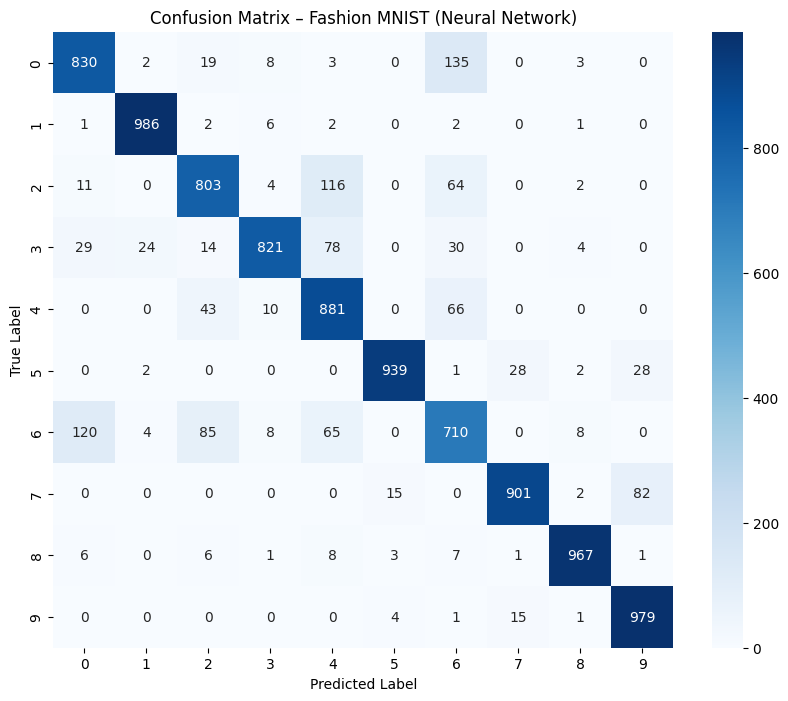

In [18]:
import seaborn as sns


cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(10,8))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues'
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – Fashion MNIST (Neural Network)")
plt.show()
